In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:
df = pd.read_csv('./work/viikko5/datasets/salary.csv')

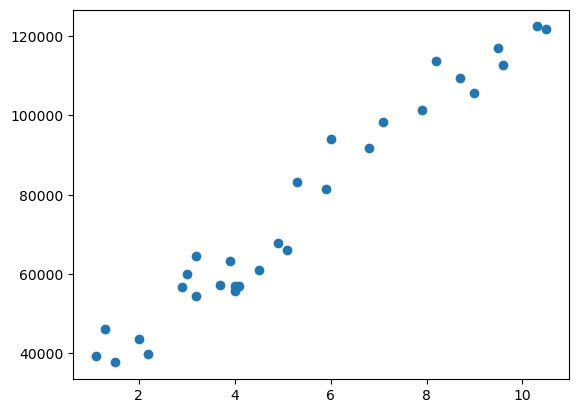

In [23]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.show()

PearsonRResult(statistic=0.9782416184887599, pvalue=1.1430681092271567e-20)

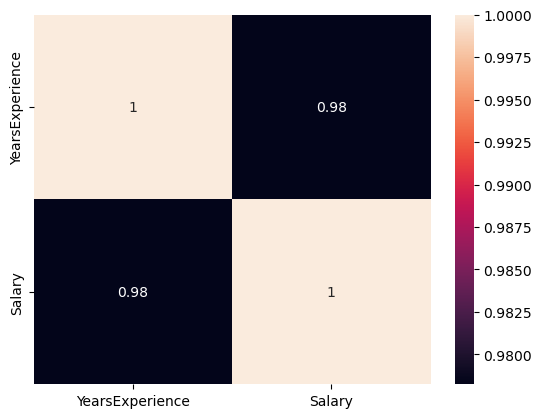

In [24]:
corr = df.corr()
sns.heatmap(corr, annot=True)

pearsonr(df['YearsExperience'], df['Salary'])

In [25]:
X = df.iloc[:, [0]]
y = df.iloc[:, [1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
coef = model.coef_
inter = model.intercept_

print(f'Suoran yhtälö: Salary = {coef[0]} * YearsOfExperience + {inter}')

Suoran yhtälö: Salary = [9360.26128619] * YearsOfExperience + [26777.3913412]


In [28]:
y_pred = model.predict(X_test)

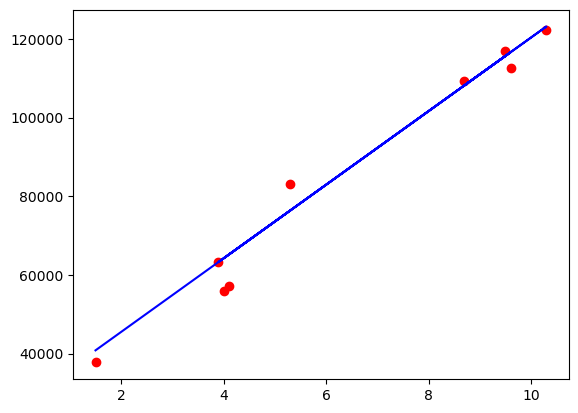

In [29]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.show()

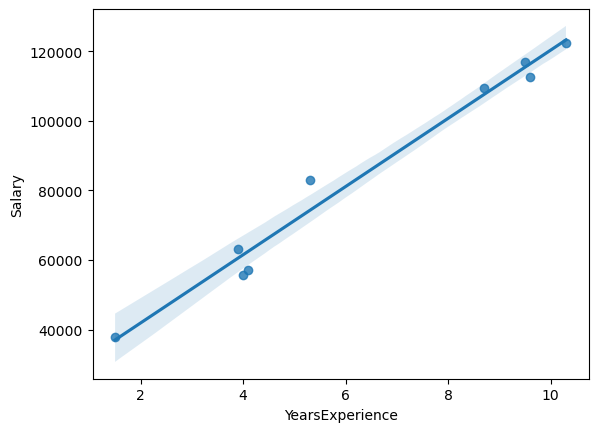

In [30]:
sns.regplot(x=X_test, y=y_test)
plt.show()

In [31]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'r2: {r2}')
print(f'mae: {mae}')
print(f'rmse: {rmse}')

r2: 0.9740993407213511
mae: 3737.417861878896
rmse: 4834.260936361728


In [32]:
print(f'Palkka 7 vuoden kokemuksella: {model.predict([[7]])}')

Palkka 7 vuoden kokemuksella: [[92299.22034455]]


/opt/conda/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
